# Task 5: Exploratory Data Analysis

### Problem Statement:
You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data?


### Solution:

In [136]:
# Let us first import the modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [137]:
# loading our dataset
df = pd.read_csv('C:\\Users\\Tejasvi Jain\\Downloads\\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [138]:
# Dropping the postal code
df=df.drop(columns='Postal Code',axis=1)

In [139]:
# Checking for any missing values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [140]:
# Checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [141]:
# To get the summary of all the cols
# Here we will get the NaN for the summary field which are not appropriate for that datatype
# of the column
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


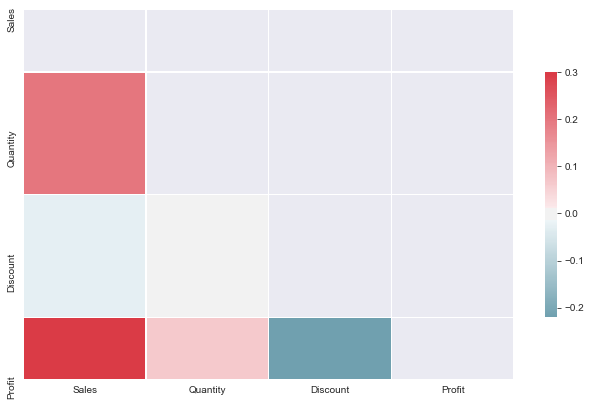

In [142]:
# Let us get the correlation in the data

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### From the above correlation matrix we can tell there is a very strong direct correlation between the sales and the profit i.e., more sales, more profit and also a strong indirect correlation between profit and the discount provided i.e., more discount less profit

### Data Visualisation

Let's find out some more about the relationships observed through the correlation matrix. 

Text(0.5, 1.0, 'Profit Loss Spectrum')

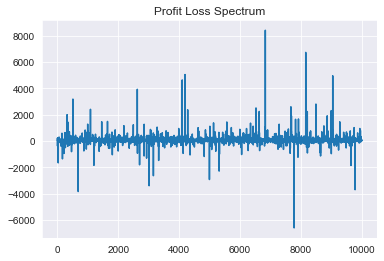

In [143]:
# Range of profit and loss
Profit_column=df['Profit']
plt.plot(Profit_column)
plt.title('Profit Loss Spectrum')

In [144]:
print('Maximum Profit:',Profit_column.max())

Maximum Profit: 8399.976


In [145]:
print('Maximum Loss:',Profit_column.min())

Maximum Loss: -6599.978


From Here we notice that there is a wide range of profits and losses can amount upto 6599 dollars.

In [146]:
# Checking for losses
df['Profit']<=0

0       False
1       False
2       False
3        True
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Name: Profit, Length: 9994, dtype: bool

In [147]:
# Loss wise data distribution
Loss=df[df['Profit']<=0]
Loss

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...
9921,Standard Class,Home Office,United States,Akron,Ohio,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,West,Furniture,Tables,71.0880,2,0.20,-1.7772
9962,First Class,Home Office,United States,Houston,Texas,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704


##### Let's check any relation between categorial variables:

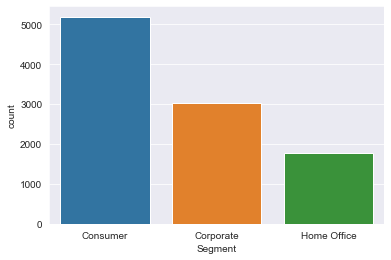

In [148]:
# Segment Distribution
sns.set_style('darkgrid')
sns.countplot(x='Segment',data=df)

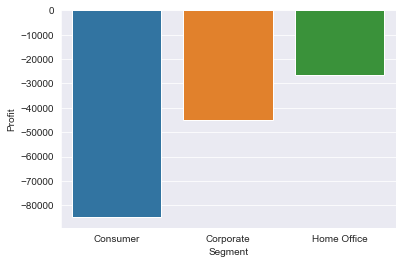

In [149]:
# Profits/Losses of each segment
Segment_sum=Loss.loc[:,["Segment","Profit"]]
Segment_sum=Segment_sum.groupby(['Segment'], as_index=False).sum()
sns.barplot(x=Segment_sum['Segment'],y=Segment_sum['Profit'])


In [150]:
Segment_sum.head()

,Segment,Profit
0,Consumer,-84945.7112
1,Corporate,-44787.2076
2,Home Office,-26398.3669


##### Hence we can tell the maximum demand is from consumer segment and the maximum profit and loss generated is also from the comsumer segment.

In a similar way let's also check loss making shipping mode:

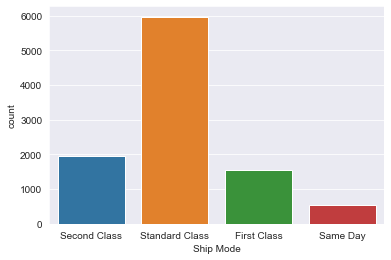

In [151]:
# SHipping Mode 
sns.set_style('darkgrid')
sns.countplot(x='Ship Mode',data=df)

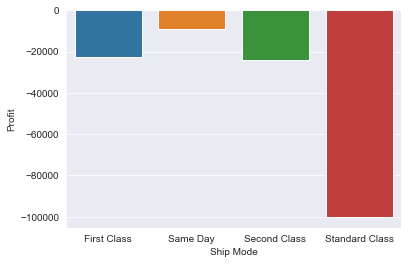

In [152]:
Segment_sum=Loss.loc[:,["Ship Mode","Profit"]]
Segment_sum=Segment_sum.groupby(['Ship Mode'], as_index=False).sum()
sns.barplot(x=Segment_sum['Ship Mode'],y=Segment_sum['Profit'])

In [153]:
Segment_sum

,Ship Mode,Profit
0,First Class,-22660.2709
1,Same Day,-8898.1054
2,Second Class,-24224.3729
3,Standard Class,-100348.5365


##### Hence we can see that the standard shipping mode proves to be inefficient means.

Now let's look at the profit and sales data of categories and sub-categories

In [154]:
# Checking for types of categories and sub-categories
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [155]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [156]:
categories_all=df.loc[:,['Category','Sub-Category','Sales','Quantity','Profit','Discount']]
categories_all

,Category,Sub-Category,Sales,Quantity,Profit,Discount
0,Furniture,Bookcases,261.9600,2,41.9136,0.00
1,Furniture,Chairs,731.9400,3,219.5820,0.00
2,Office Supplies,Labels,14.6200,2,6.8714,0.00
3,Furniture,Tables,957.5775,5,-383.0310,0.45
4,Office Supplies,Storage,22.3680,2,2.5164,0.20
...,...,...,...,...,...,...
9989,Furniture,Furnishings,25.2480,3,4.1028,0.20
9990,Furniture,Furnishings,91.9600,2,15.6332,0.00
9991,Technology,Phones,258.5760,2,19.3932,0.20
9992,Office Supplies,Paper,29.6000,4,13.3200,0.00


In [157]:
category_diff=categories_all.groupby(['Category'],as_index=False).sum()
category_diff

,Category,Sales,Quantity,Profit,Discount
0,Furniture,741999.7953,8028,18451.2728,368.89
1,Office Supplies,719047.0320,22906,122490.8008,947.80
2,Technology,836154.0330,6939,145454.9481,244.40


#### From all the above information we can conclude that furniture despite having good number of sales generates very little profit as compared to technology that generates very high profits with almost similar number of sales

Since Furniture is the loss making category let's explore more of it's sub-categories:


In [158]:
# Exploring Sub-categories of furniture
furniture_all=categories_all[categories_all['Category']=='Furniture']
furniture_all.groupby(['Sub-Category'],as_index=False).sum()

,Sub-Category,Sales,Quantity,Profit,Discount
0,Bookcases,114879.9963,868,-3472.5560,48.14
1,Chairs,328449.1030,2356,26590.1663,105.00
2,Furnishings,91705.1640,3563,13059.1436,132.40
3,Tables,206965.5320,1241,-17725.4811,83.35


#### Hence we can clearly observe that Bookcases and Tables generates losses though the sales number is high.

In [164]:
# Exploring Sub-categories of Technology
furniture_all=categories_all[categories_all['Category']=='Technology']
furniture_all.groupby(['Sub-Category'],as_index=False).sum()

,Sub-Category,Sales,Quantity,Profit,Discount
0,Accessories,167380.318,2976,41936.6357,60.8
1,Copiers,149528.030,234,55617.8249,11.0
2,Machines,189238.631,440,3384.7569,35.2
3,Phones,330007.054,3289,44515.7306,137.4


#### It can be clearly seen that technology generates highest profit with highest number of sales and lower discount compared to furniture and office supplies

Now let's also analyse the impact of discount provided on profit by various products:

C:\Users\Tejasvi Jain\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


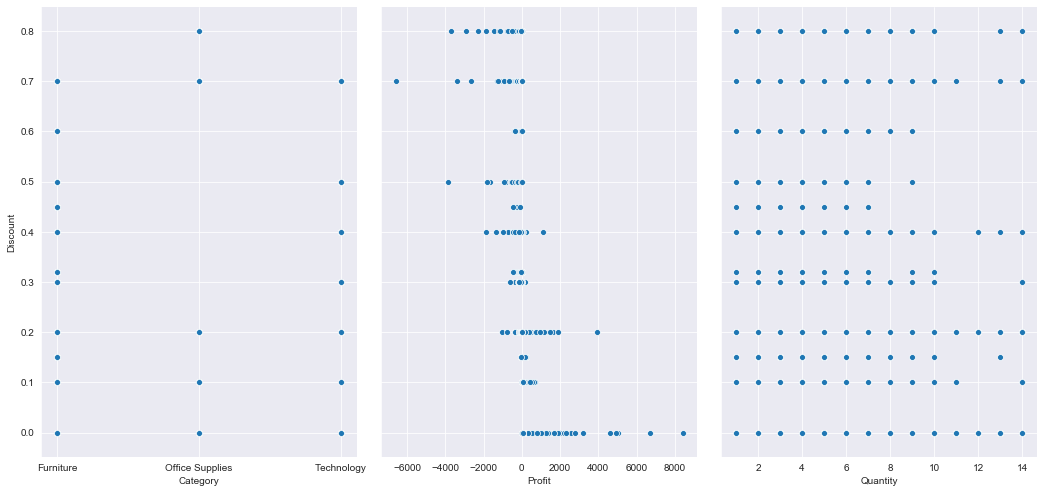

In [159]:
# Bivariate Analysis
sns.pairplot(df[0:10000], x_vars=['Category', 'Profit', 'Quantity'], y_vars='Discount',
             size=7, aspect=0.7, kind='scatter')

##### Therefore Bivariate analysis of discount with categories, profit and quantity tells the same story. Most of the discount is provided on furniture and losses are more when higher discount is provided even though quantities sold are high.

Let's analyse the sales and profit data for the different States and Cities:

In [160]:
States_cities=df.loc[:,['State','City','Sales','Quantity','Profit']]
States_cities

,State,City,Sales,Quantity,Profit
0,Kentucky,Henderson,261.9600,2,41.9136
1,Kentucky,Henderson,731.9400,3,219.5820
2,California,Los Angeles,14.6200,2,6.8714
3,Florida,Fort Lauderdale,957.5775,5,-383.0310
4,Florida,Fort Lauderdale,22.3680,2,2.5164
...,...,...,...,...,...
9989,Florida,Miami,25.2480,3,4.1028
9990,California,Costa Mesa,91.9600,2,15.6332
9991,California,Costa Mesa,258.5760,2,19.3932
9992,California,Costa Mesa,29.6000,4,13.3200


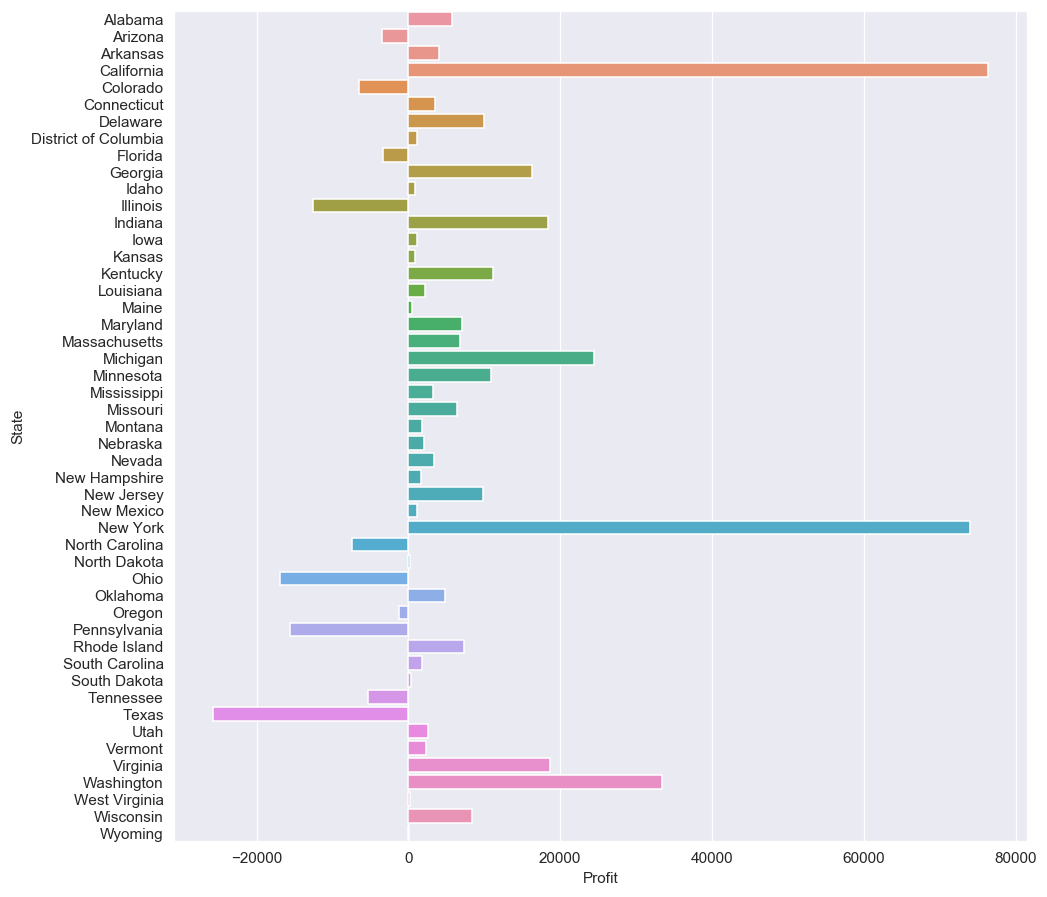

In [161]:
# Visualising profit data of States
plt.figure(figsize=(10,10),dpi=110)
States_sales_profit=States_cities.groupby(['State'],as_index=False).sum()
sns.barplot(y=States_sales_profit['State'],x=States_sales_profit['Profit'])

Let's futher analyse the loss making states:

In [162]:
# Aggregating Loss making states
States_loss=States_sales_profit[States_sales_profit['Profit']<=0]
States_loss

,State,Sales,Quantity,Profit
1,Arizona,35282.0010,862,-3427.9246
4,Colorado,32108.1180,693,-6527.8579
8,Florida,89473.7080,1379,-3399.3017
11,Illinois,80166.1010,1845,-12607.8870
31,North Carolina,55603.1640,983,-7490.9122
33,Ohio,78258.1360,1759,-16971.3766
35,Oregon,17431.1500,499,-1190.4705
36,Pennsylvania,116511.9140,2153,-15559.9603
40,Tennessee,30661.8730,681,-5341.6936
41,Texas,170188.0458,3724,-25729.3563


#### From this we can observe Texas is the most loss making State with the highest quantity sold followed by Ohio and Pennsylvania

## CONCLUSION:

**1. Standard shipping mode is the most inefficient means which can be looked after to eliminate the factors causing losses.**

**2. Bookcases and tables in the Sub-categories can be removed which can help cut losses. Since the sales of these products are high, we can work with the discount provided on such products to make use of high sales figure.**

**3.We can also Remove the entire loss making sub categories and divert the resources to the highest profit making categories and subcategories which are Technology.**

**3. We also conclude that Texas is the largest loss making state followed by Ohio and Pennsylvania which can also be looked into and cut ineffieciencies causing losses.**